In [2]:
import numpy as np
import pandas as pd
import os
import zipfile
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator, load_img
import shutil
%matplotlib inline

In [3]:
# os.listdir()

### Unzip train and test files

In [103]:
# zip_ref = zipfile.ZipFile('train.zip','r')
# zip_ref.extractall('train')


In [104]:
# zip_ref.close()

In [105]:
# zip_ref = zipfile.ZipFile('test1.zip','r')
# zip_ref.extractall('test_dir')
# zip_ref.close()

### Make directories 'cats' and 'dogs' in 'train' directory

In [4]:
train_dir = os.path.join('train_dir')
train_cats_dir = os.path.join('train_dir/cats')
train_dogs_dir = os.path.join('train_dir/dogs')

In [5]:
# os.mkdir(train_dir)
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)

### Make a validation directory and make 'cats' and 'dogs' directories within it

In [6]:
validation_dir = os.path.join('validation_dir')
validation_cats_dir = os.path.join('validation_dir/cats')
validation_dogs_dir = os.path.join('validation_dir/dogs')

In [107]:
# os.mkdir(validation_dir)
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)

### Copy cat and dog images to each directory

In [7]:
filenames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for name in filenames:
    src = os.path.join('train/train',name)
    dst = os.path.join(train_cats_dir, name)
    shutil.copyfile(src,dst)

In [8]:
filenames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for name in filenames:
    src = os.path.join('train/train',name)
    dst = os.path.join(train_dogs_dir, name)
    shutil.copyfile(src,dst)

In [9]:
filenames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for name in filenames:
    src = os.path.join('train/train',name)
    dst = os.path.join(validation_cats_dir, name)
    shutil.copyfile(src,dst)

In [10]:
filenames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for name in filenames:
    src = os.path.join('train/train',name)
    dst = os.path.join(validation_dogs_dir, name)
    shutil.copyfile(src,dst)

In [11]:
print('training cat images:', len(os.listdir(train_cats_dir)))
print('training dog images:', len(os.listdir(train_dogs_dir)))
print('validation cat images:', len(os.listdir(validation_cats_dir)))
print('validation cat images:', len(os.listdir(validation_dogs_dir)))

training cat images: 10000
training dog images: 10000
validation cat images: 2500
validation cat images: 2500


In [12]:
import PIL

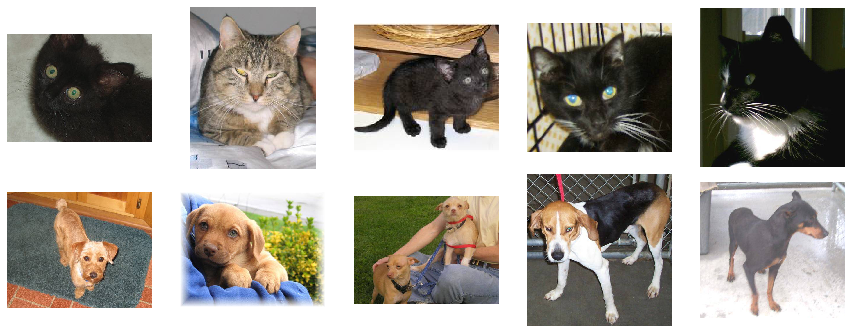

In [16]:
cats = os.listdir(train_cats_dir)
dogs = os.listdir(train_dogs_dir)
fig,axes = plt.subplots(2,5, figsize = (15,15))
plt.subplots_adjust(bottom=0.4, top=0.7, hspace=0)
for i in range(5):
    sample = random.choice(cats)
    image = load_img("train_dir/cats/"+sample)
    axes[0,i].imshow(image)
    axes[0,i].axis('off')
    sample = random.choice(dogs)
    image = load_img("train_dir/dogs/"+sample)
    axes[1,i].imshow(image)
    axes[1,i].axis('off')
    


### Define a CNN model

In [12]:
from keras import layers
from keras import models
from keras import optimizers

In [14]:
img_size = 150
channels = 3

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', 
                        input_shape=(img_size,img_size,channels)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)      

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

### Data preprocessing
Convert images into tensors

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory('train_dir/',
                                                   target_size = (img_size,img_size),
                                                   batch_size = 256,
                                                   class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [20]:
validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_directory('validation_dir/',
                                                             target_size = (img_size,img_size),
                                                             batch_size = 128,
                                                             class_mode = 'binary')

Found 5000 images belonging to 2 classes.


### Train the model

In [21]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=78,
                             epochs=50,
                             verbose=2,
                             validation_data = validation_generator,
                             validation_steps = 39)

Epoch 1/50
 - 571s - loss: 0.6758 - acc: 0.5782 - val_loss: 0.6573 - val_acc: 0.6554
Epoch 2/50
 - 374s - loss: 0.6130 - acc: 0.6631 - val_loss: 0.5197 - val_acc: 0.6923
Epoch 3/50
 - 405s - loss: 0.5652 - acc: 0.7045 - val_loss: 0.5298 - val_acc: 0.7572
Epoch 4/50
 - 388s - loss: 0.5389 - acc: 0.7232 - val_loss: 0.5103 - val_acc: 0.7452
Epoch 5/50
 - 342s - loss: 0.5102 - acc: 0.7478 - val_loss: 0.4353 - val_acc: 0.7410
Epoch 6/50
 - 349s - loss: 0.4925 - acc: 0.7583 - val_loss: 0.5772 - val_acc: 0.8005
Epoch 7/50
 - 349s - loss: 0.4713 - acc: 0.7773 - val_loss: 0.3103 - val_acc: 0.7692
Epoch 8/50
 - 366s - loss: 0.4640 - acc: 0.7821 - val_loss: 0.3664 - val_acc: 0.7893
Epoch 9/50
 - 367s - loss: 0.4389 - acc: 0.7963 - val_loss: 0.5681 - val_acc: 0.7851
Epoch 10/50
 - 351s - loss: 0.4310 - acc: 0.8036 - val_loss: 0.5587 - val_acc: 0.8157
Epoch 11/50
 - 339s - loss: 0.4180 - acc: 0.8075 - val_loss: 0.3716 - val_acc: 0.8037
Epoch 12/50
 - 330s - loss: 0.4076 - acc: 0.8153 - val_loss: 0.

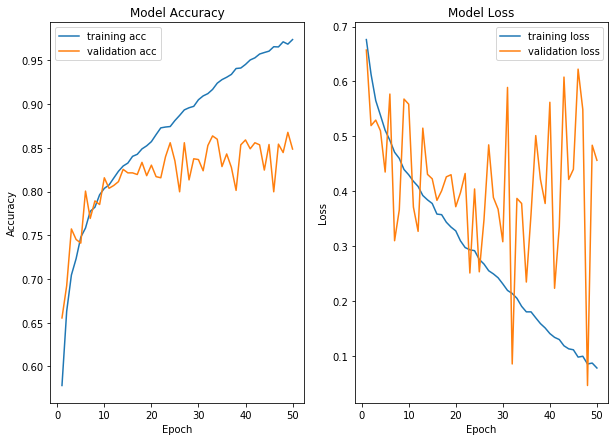

In [25]:
fig, axs = plt.subplots(1,2, figsize = (10,7))
axs[0].plot(range(1,len(history.history['acc'])+1), history.history['acc'], label = 'training acc')
axs[0].plot(range(1,len(history.history['val_acc'])+1), history.history['val_acc'], label='validation acc')
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(loc='best')
axs[1].plot(range(1,len(history.history['loss'])+1), history.history['loss'], label='training loss')
axs[1].plot(range(1,len(history.history['val_loss'])+1), history.history['val_loss'], label='validation loss')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='best')

In [26]:
classes = train_generator.class_indices
print(classes)

{'cats': 0, 'dogs': 1}


### Preparing test set

In [129]:
test_filenames = os.listdir('test_dir/test1/')
test_df = pd.DataFrame({'filename': test_filenames})
test_samples = test_df.shape[0]
print(test_samples)

12500


In [130]:
test_df['name_index'] = test_df['filename'].str.split('.').str[0]

In [131]:
test_df['name_index'] = test_df['name_index'].astype('int')

In [132]:
test_df.sort_values(by = ['name_index'], ascending=True, inplace=True)

In [133]:
test_df = test_df.reset_index(drop=True)
test_df.drop(columns=['name_index'], inplace=True)
test_df.head(3)

,filename
0,1.jpg
1,2.jpg
2,3.jpg


In [134]:
test_datagen = ImageDataGenerator(rescale=1/255.0)
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                'test_dir/test1/',
                                                  x_col = 'filename',
                                                  y_col = None,
                                                 target_size = (img_size,img_size),
                                                 batch_size = 128,
                                                 class_mode = None,
                                                 shuffle=False)

Found 12500 validated image filenames.


In [135]:
predict = model.predict_generator(test_generator,
                                 steps= np.ceil(test_samples/128))

In [136]:
predict[3]

array([0.9987653], dtype=float32)

In [137]:
for i in range(len(predict)):
    if (predict[i] >= 0.5):
#         print(predict[i])
        test_df.loc[i,'category'] = 'dog'
    else:
#         print(predict[i], 'cat')
        test_df.loc[i,'category'] = 'cat'


In [139]:
test_df.head(10)

,filename,category
0,1.jpg,dog
1,2.jpg,dog
2,3.jpg,dog
3,4.jpg,dog
4,5.jpg,cat
5,6.jpg,cat
6,7.jpg,cat
7,8.jpg,cat
8,9.jpg,cat
9,10.jpg,cat


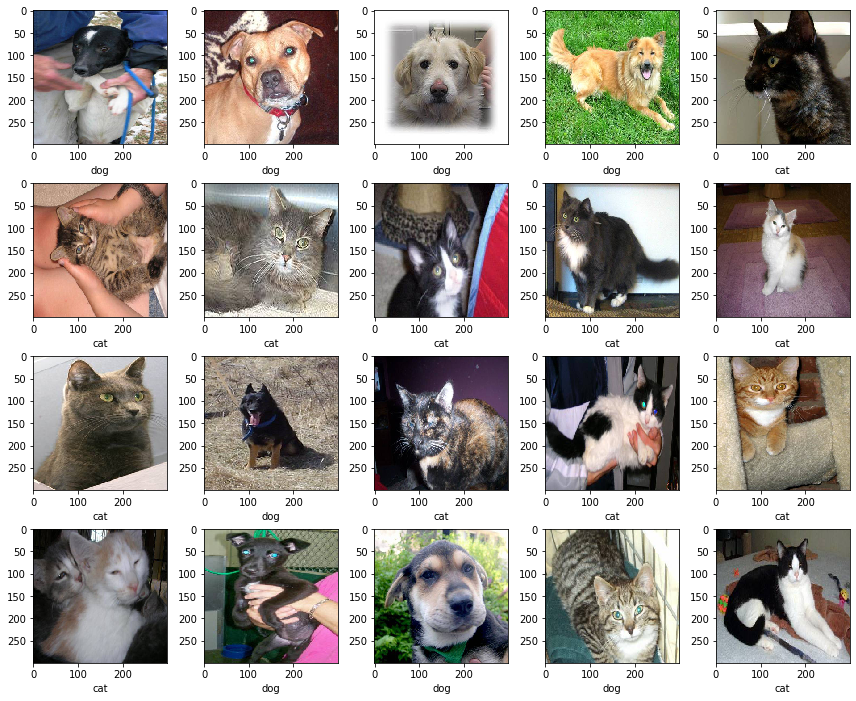

In [155]:
test_sample = test_df.head(20)
plt.figure(figsize=(12, 24))

for index, row in test_sample.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test_dir/test1/"+filename, target_size=(300,300))
    plt.subplot(4, 5, index+1)
    plt.imshow(img)
    plt.xlabel( category )
#     plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)

In [158]:
submit_df = test_df.copy()
submit_df['category'].replace({'dog':1, 'cat':0}, inplace=True)

In [159]:
submit_df['id'] = test_df['filename'].str.split('.').str[0]

In [160]:
submit_df['label'] = submit_df['category']

In [162]:
submit_df = submit_df.drop(columns=['filename','category'])

In [163]:
submit_df.to_csv('submission.csv', index=False)